# Project Overview
The aim of this projects is to introduce you to data visualization with Python as concrete and as consistent as possible. Using what you've learned; download the London Crime Dataset from Kaggle. This data cover the number of criminal reports by month, LSOA borough, and major/minor catagory from Jan 2008-Dec 2016.

## Dataset Sources:
https://www.kaggle.com/datasets/jboysen/london-crime?resource=download

## This dataset contain:
1. lsoa_code: represents a policing area
2. borough: the London borough for which the statistic is related
3. major_category: the major crime category
4. minor_category: the minor crime catagory
5. value: the count of the crime for that particular borough, in that particular month
6. year: the year of the summary statistic
7. month: the month of the summary statistic

## Example question can be:
1. What is the change in the number of crimei incidents from 2011 to 2016?
2. What where the top 3 crimes per borough in 2016?
3. Lanjutkan...

## Import,Read and Check Every Detail with data csv have

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import pandas lib
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import folium

In [3]:
# Import Dataset using pandas
df = pd.read_csv('/content/drive/MyDrive/Dataset/dataset_csv/data_kejahatan_di_london/london_crime_by_lsoa.csv')
df=df.rename(columns={'borough':'city','major_category':'group'})
# i want to drop code police distric

df.head()

,lsoa_code,city,group,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
# i want to see describe this csv file 
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [5]:
df.tail()

,lsoa_code,city,group,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   city            object
 2   group           object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [7]:
df.shape # how to read the this result -> (rows,columns)

(13490604, 7)

In [8]:
# Checking the null value
df.isnull().sum()

lsoa_code         0
city              0
group             0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [9]:
df.columns

Index(['lsoa_code', 'city', 'group', 'minor_category', 'value', 'year',
       'month'],
      dtype='object')

In [10]:
df.group.unique()

array(['Burglary', 'Violence Against the Person', 'Robbery',
       'Theft and Handling', 'Criminal Damage', 'Drugs',
       'Fraud or Forgery', 'Other Notifiable Offences', 'Sexual Offences'],
      dtype=object)

In [11]:
# i want to know the value unique every column
print(f'tahun berapa aja yang ada\n{df.year.value_counts()}')
print(f'berapa banyak kasus yang masuk per bulan{df.month.value_counts()}')

tahun berapa aja yang ada
2016    1498956
2015    1498956
2008    1498956
2012    1498956
2010    1498956
2013    1498956
2014    1498956
2011    1498956
2009    1498956
Name: year, dtype: int64
berapa banyak kasus yang masuk per bulan11    1124217
5     1124217
3     1124217
6     1124217
7     1124217
4     1124217
9     1124217
8     1124217
12    1124217
1     1124217
10    1124217
2     1124217
Name: month, dtype: int64


### A. Area Plot
How do the number of each major category of crimes vary by year?

In [12]:
df.group.unique()

array(['Burglary', 'Violence Against the Person', 'Robbery',
       'Theft and Handling', 'Criminal Damage', 'Drugs',
       'Fraud or Forgery', 'Other Notifiable Offences', 'Sexual Offences'],
      dtype=object)

tahun ke:
[2008 2009 2010 2011 2012 2013 2014 2015 2016]
jumlah kasusnya:
[715324 736121 737329 711624 724915 686407 680183 717214 738641]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


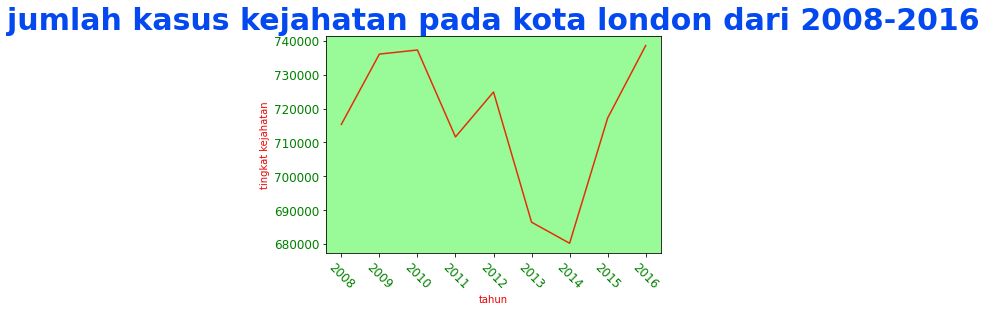

In [55]:
tahun=df['year'].unique()
sumsandyear=df.groupby('year').sum()
sums=sumsandyear['value'].to_numpy()

n = len(tahun)

for x in range(n):
    for y in range(0, n-x-1):
        if tahun[y] > tahun[y+1] :
                tahun[y], tahun[y+1] = tahun[y+1], tahun[y]
                sums[y], sums[y+1] = sums[y+1], sums[y]
print('tahun ke:\n{}'.format(tahun))
print('jumlah kasusnya:\n{}'.format(sums))
urut=np.arange(len(tahun))
# buat font agar cantik
font = {'family': 'Impact',
        'color':  '#0448F0',
        'weight': 'bold',
        'size': 30,
        }
plt.xticks(urut,tahun)
plt.title('jumlah kasus kejahatan pada kota london dari 2008-2016',fontdict=font)
plt.plot(sums,color='#E62D0B')
plt.xlabel('tahun',color='#EC0606')
plt.ylabel('tingkat kejahatan',color='#EC0606')
plt.xticks(rotation=-45 )
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(color='green')
plt.yticks(color='green')
ax = plt.axes()
ax.set_facecolor("palegreen")
plt.show()

#### Kesimpulan:

tingkat Kejahatan tertinggi pada tahun 2016 



### B. Histogram
How do the sum of crimes vary by year?

(array([2., 0., 1., 3., 3.]),
 array([680183. , 691874.6, 703566.2, 715257.8, 726949.4, 738641. ]),
 <a list of 5 Patch objects>)

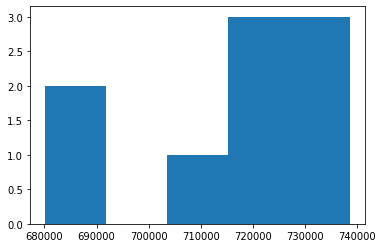

In [62]:
# kita buat hitung dulu
jumlah_kasus=df.groupby('year').sum()
urutkan_kasus=sumsandyear['value'].to_numpy()
plt.hist(urutkan_kasus,bins=5)

#### Kesimpulan:
bahwa kepadatan tingkat kejahatan bisa menyetuh 74000 dengan jenis kejahatan yang berbeda

### C. Bar Chart
How do the sum of crimes vary by borough ?

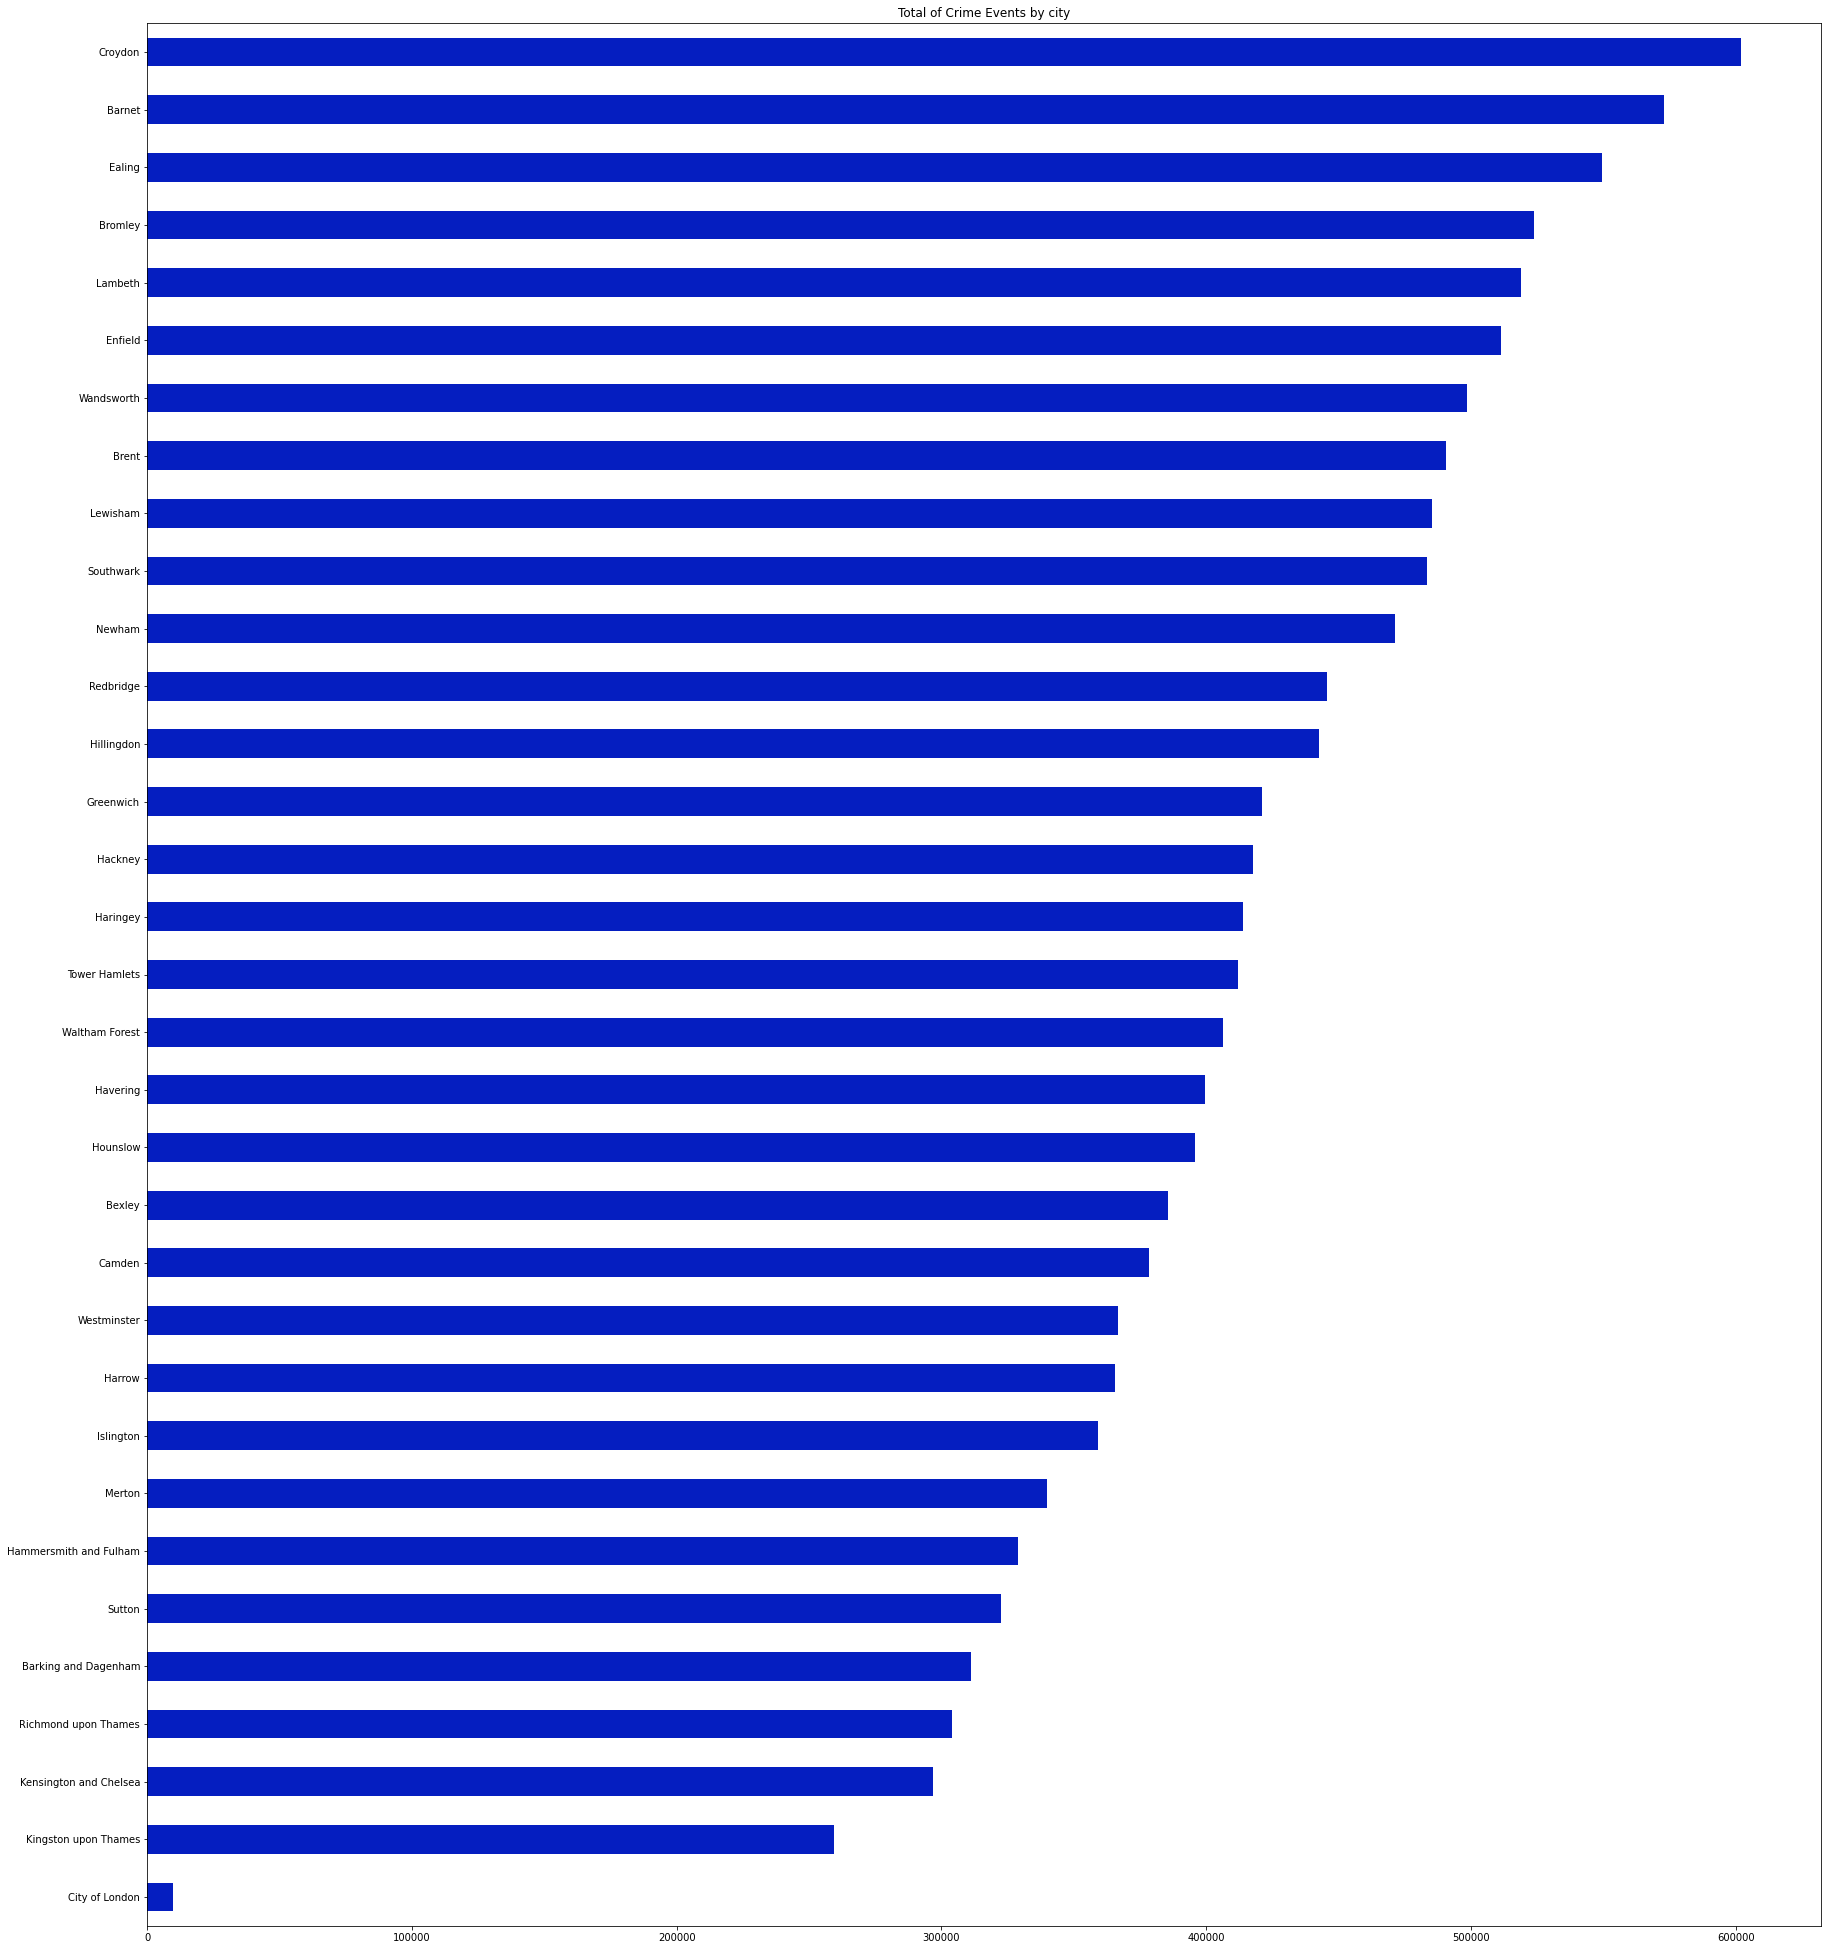

In [14]:
plt.figure(figsize=(30,35))
df['city'].value_counts().sort_values().plot(kind='barh',color = '#051EC0', title = 'Total of Crime Events by city')

#### Kesimpulan:


```
# The crydon city is fisrt rank in crime 
```



### D. Pie Chart
Which number of major category of crime are most in London ?

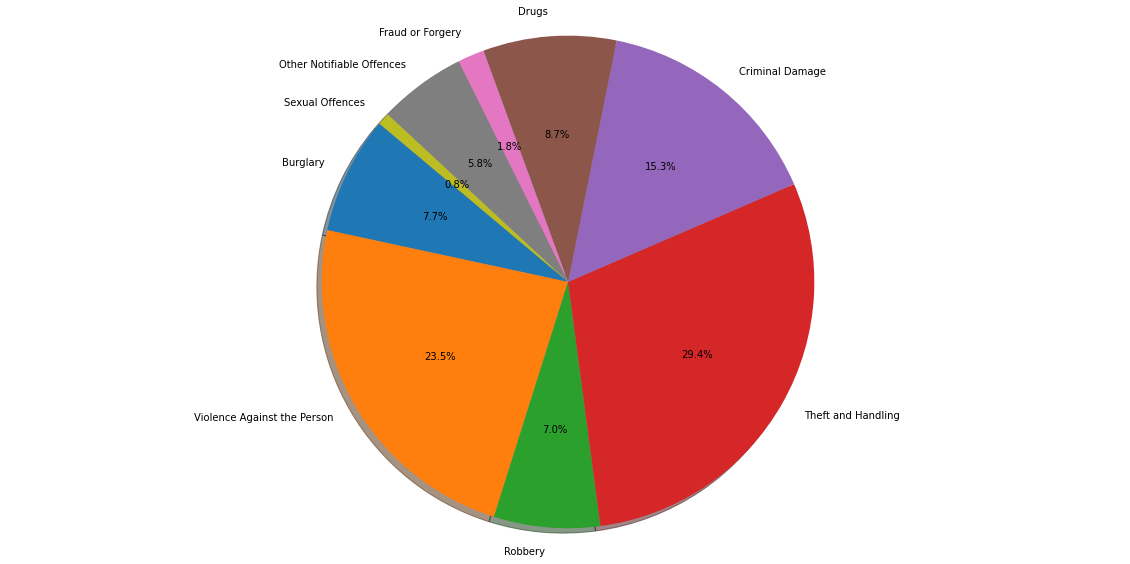

In [15]:
# make function for numberic the most crime years
def count_level_crime_year(name_column,list_unique):
    count=0
    result=[]
    while count<len(list_unique):
      result.append(len(df.loc[df[name_column]==list_unique[count]]))
      count+=1
    return list_unique,result
def pie_plot(list_number, list_unique):
    plt.figure(figsize=(20,10))
    plt.pie(list_unique, 
        labels=list_number,
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=140)
 
    plt.axis('equal')
    plt.show()

# Create data
data_uniqe_year,lst_count_year=count_level_crime_year('group',df['group'].unique())
pie_plot(data_uniqe_year,lst_count_year)
# Area plot
# plt.figure(figsize=(20,10)) #lebar 20 panjangnya 10
# plt.pie(lst_count_year,labels=data_uniqe_year,autopct='%1.1f%%',shadow=True,startangle=120)
# plt.axis('equal')
# plt.show()

#### Kesimpulan:
> Bahwa tingkat tipe kejahatan di kota london yang paling dominan adalah **pencurian** dan disusul oleh tingkat kekerasan


### E. Box Plot

In [16]:
df.columns


Index(['lsoa_code', 'city', 'group', 'minor_category', 'value', 'year',
       'month'],
      dtype='object')

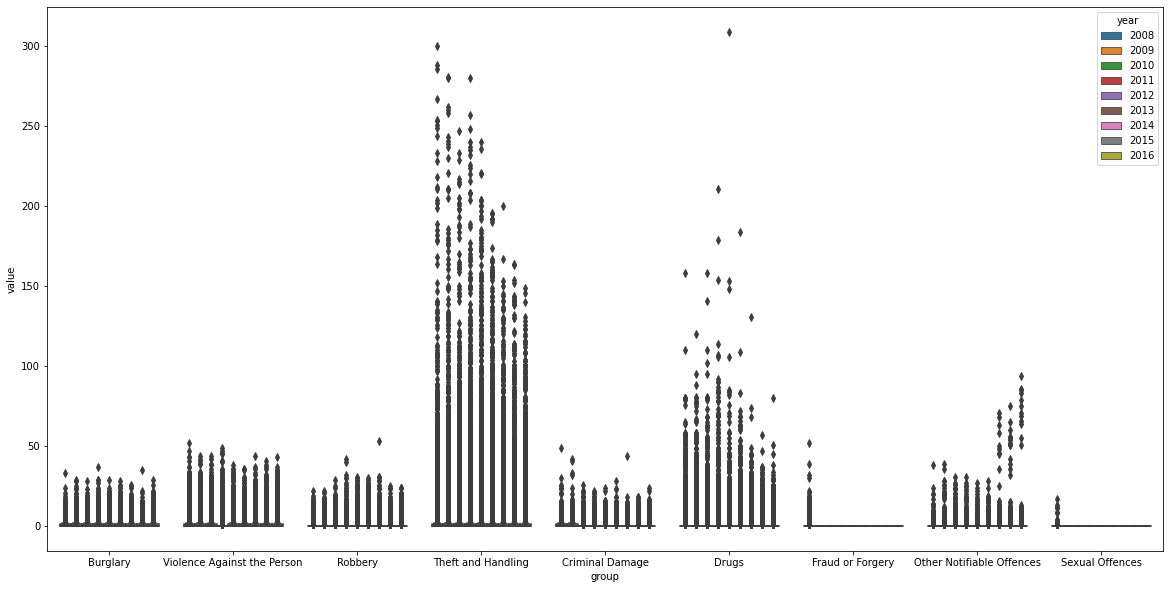

In [17]:
df_crimes_group=df[(df['group']=='Burglary')|(df['group']=='Violence Against the Person')|(df['group']=='Robbery')]
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x='group',y='value',hue='year')

#### Kesimpulan:
bahwa kasus kejahatan tidak saling memperaguhi satu sama lain


### F. Scatter Plot

In [18]:
df.head()

,lsoa_code,city,group,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


noted of crime in each month in the year 2016
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
[58847 56697 59167 58637 63990 62262 65519 62666 61412 63405 61064 62455]


(array([56000., 58000., 60000., 62000., 64000., 66000.]),
 <a list of 6 Text major ticklabel objects>)

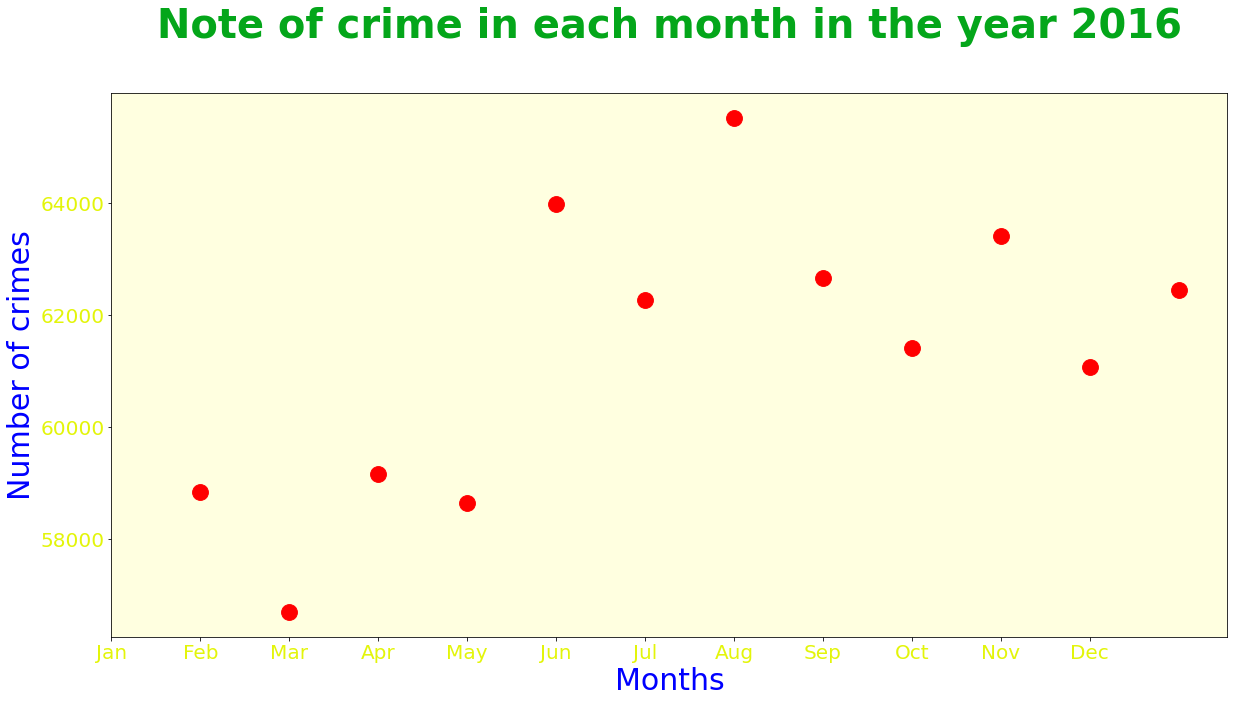

In [19]:
# kita ambil tahun akhir karena batas waktunya
font = {'family': 'Verdana',
        'color':  '#04A61A',
        'weight': 'bold',
        'size': 40,
        }
year2016=df.loc[df['year'] == 2016]

months=year2016['month'].unique()

months.sort()

sum_month=year2016.groupby(['month']).sum()

Values=sum_month['value'].to_numpy()
name_of_months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
print("noted of crime in each month in the year 2016")
print(name_of_months)
print(Values)
n1 = np.arange(len(months))
xrange=range(1,13)
    
plt.figure(figsize=(20,10))
ax = plt.axes()
ax.set_facecolor("lightyellow")
plt.scatter(xrange,Values,s=250,color='red',cmap='viridis',alpha=1)
plt.title("Note of crime in each month in the year 2016\n",fontdict=font)
plt.xlabel('Months',fontsize=30,color='blue')
plt.ylabel('Number of crimes',fontsize=30,color='blue')
plt.xticks(n1,name_of_months)
plt.xticks(color='#E3F50A',fontsize=20)
plt.yticks(color='#E3F50A',fontsize=20)

#### Kesimpulan:

### G. Word Clouds

In [20]:
df["minor_category"].value_counts()

Common Assault                            522180
Theft From Motor Vehicle                  522180
Other Theft                               522180
Burglary in Other Buildings               522072
Theft/Taking Of Motor Vehicle             522072
Harassment                                522072
Criminal Damage To Motor Vehicle          521964
Assault with Injury                       521856
Other Criminal Damage                     521856
Possession Of Drugs                       521748
Burglary in a Dwelling                    521532
Criminal Damage To Dwelling               521424
Personal Property                         520668
Motor Vehicle Interference & Tampering    520452
Other Notifiable                          519696
Other Theft Person                        519480
Wounding/GBH                              519372
Theft/Taking of Pedal Cycle               516996
Other violence                            512028
Criminal Damage To Other Building         503928
Drug Trafficking    

In [21]:
df_minor_category = df['minor_category']
df_minor_category

0           Burglary in Other Buildings
1                        Other violence
2                        Other violence
3           Burglary in Other Buildings
4                     Personal Property
                       ...             
13490599    Criminal Damage To Dwelling
13490600              Personal Property
13490601         Burglary in a Dwelling
13490602              Business Property
13490603                   Wounding/GBH
Name: minor_category, Length: 13490604, dtype: object

In [22]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
from wordcloud import WordCloud, STOPWORDS

In [25]:
import matplotlib.pyplot as plt

In [26]:
stopwords = set(STOPWORDS)

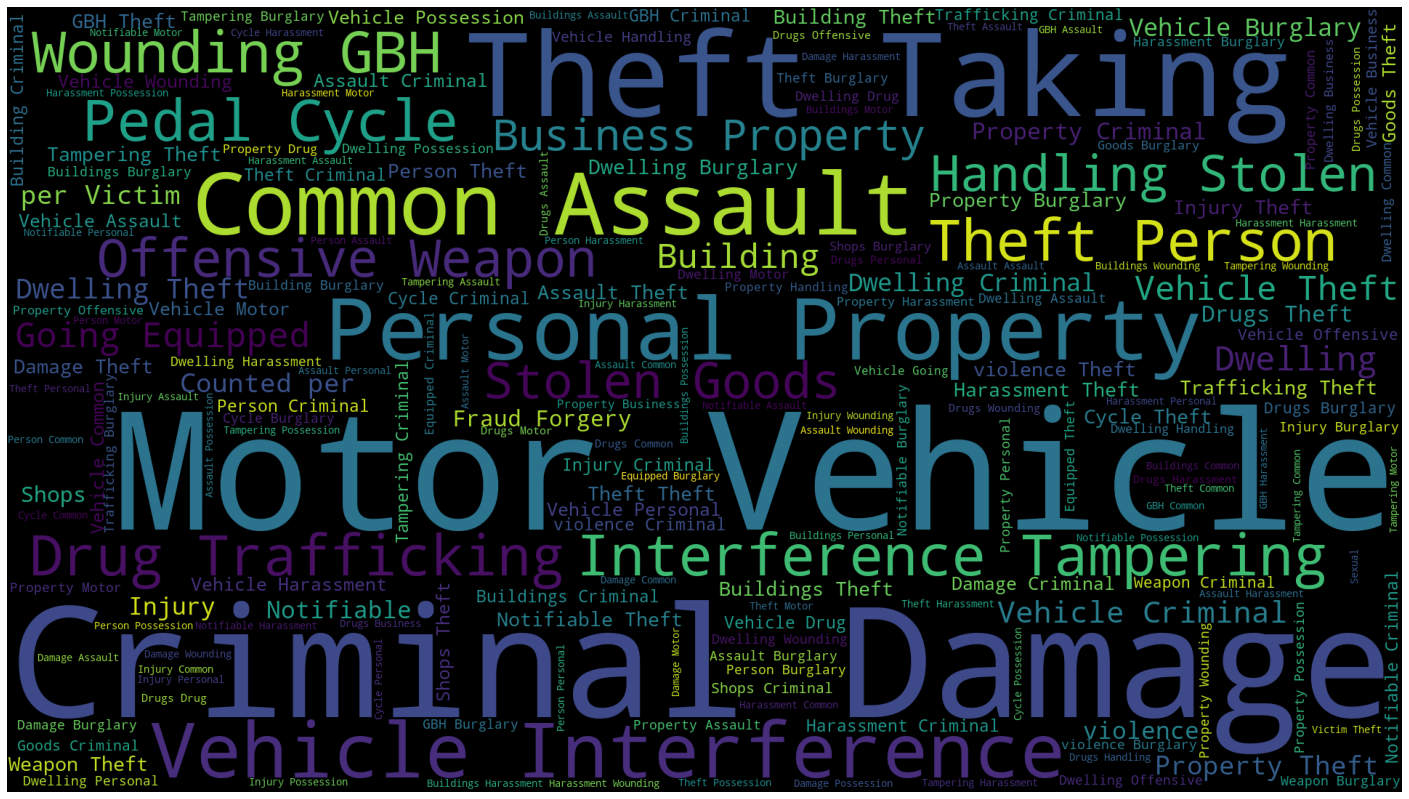

In [27]:
plt.figure(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.minor_category))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

#### Kesimpulan:

### H. Folium Maps

In [63]:
# 0.5 doesn't support tooltip, must install dev instead
!pip install git+https://github.com/python-visualization/folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/python-visualization/folium to /tmp/pip-req-build-9q9iuad2
  Running command git clone -q https://github.com/python-visualization/folium /tmp/pip-req-build-9q9iuad2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for folium: filename=folium-0.12.1.dev61+g551b242-py2.py3-none-any.whl size=96718 sha256=e61c3c62e5bb0983d1bee32573345b075ad53c24f377c3546681082fb6a588f6
  Stored in directory: /tmp/pip-ephem-wheel-cache-9vznsjza/wheels/c7/41/34/51d4fc16546a2a77c5ca875d9232ebf13d902dd87615be512c
Successfully built folium
  Attempting uninstall: folium
    Found existing installation: folium 0.12.1.post1
    Uninstalling folium-0.12.1.post1:
      Successfully uninstalled folium-0.12.1.post1


In [28]:
df["city"].value_counts()

Croydon                   602100
Barnet                    572832
Ealing                    549396
Bromley                   523908
Lambeth                   519048
Enfield                   511164
Wandsworth                498636
Brent                     490644
Lewisham                  485136
Southwark                 483300
Newham                    471420
Redbridge                 445716
Hillingdon                442584
Greenwich                 421200
Hackney                   417744
Haringey                  413856
Tower Hamlets             412128
Waltham Forest            406296
Havering                  399600
Hounslow                  395928
Bexley                    385668
Camden                    378432
Westminster               366660
Harrow                    365688
Islington                 359208
Merton                    339876
Hammersmith and Fulham    328752
Sutton                    322488
Barking and Dagenham      311040
Richmond upon Thames      304128
Kensington

In [29]:
import folium
from folium.plugins import HeatMap

In [30]:
df_borough = df[['city', 'value']]
df_borough

,city,value
0,Croydon,0
1,Greenwich,0
2,Bromley,0
3,Redbridge,0
4,Wandsworth,0
...,...,...
13490599,Brent,0
13490600,Hillingdon,1
13490601,Sutton,0
13490602,Croydon,0


In [31]:
df_boroughCroydon = df_borough['city'] == 'Croydon'
df_borough[df_boroughCroydon]

,city,value
0,Croydon,0
42,Croydon,0
43,Croydon,1
55,Croydon,0
83,Croydon,0
...,...,...
13490513,Croydon,0
13490516,Croydon,0
13490577,Croydon,0
13490595,Croydon,0


In [85]:
#url ='https://github.com/python-visualization/folium/blob/master/examples/data/world-countries.json'
#urllib.request.urlretrieve(url, 'world_countries.json')
#with urlopen('https://github.com/python-visualization/folium/blob/master/examples/data/world-countries.json') as response:
#    world_geo = json.load(response)
print("Crime rate in boroughs of london")
print("please zoom in to view the map")
df2=df[['city','value']]
world_geo = r'https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson' 
peta_london=folium.Map(location=[54.237933,-2.36967],zoom_start=5)

peta_london.choropleth(
    geo_data=world_geo,
    name='choropleth',
    data=df2,
    columns=['city', 'value'],
    key_on='feature.properties.name',
    color_continuous_scale="Viridis", 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime rate in boroughs of london'
    
)

#folium.LayerControl().add_to(world_map)
peta_london.save('LondonCrime.html')
display(peta_london)

Crime rate in boroughs of london
please zoom in to view the map


#### Kesimpulan:
bahwa tingkat kejahatan yang tinggi terjadi pada distrik E14 kota london
dan disusul oleh oleh district brixton 

### I. Preprocessing

In [90]:
df.isnull().sum().sum()

0

In [93]:

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   city            object
 2   group           object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


#### Kesimpulan:
bahwa datanya tidak ada nan/data kosong